# Looking At the Abeysuriya / Robinson Model

## Setup

In [1]:
# Generic stuff
import os,sys,numpy as np,pandas as pd
from scipy.io import loadmat


# Vizualization stuff

# Choose which setting; for widget, need to use %matplotlib notebook
%matplotlib notebook 
#%matplotlib inline 
from matplotlib import pyplot as plt

# Spectral models stuff

sys.path.append('../../code/')
from robinson import Abeysuriya2015Model

## Interactive exporation with the widget

<IPython.core.display.Javascript object>


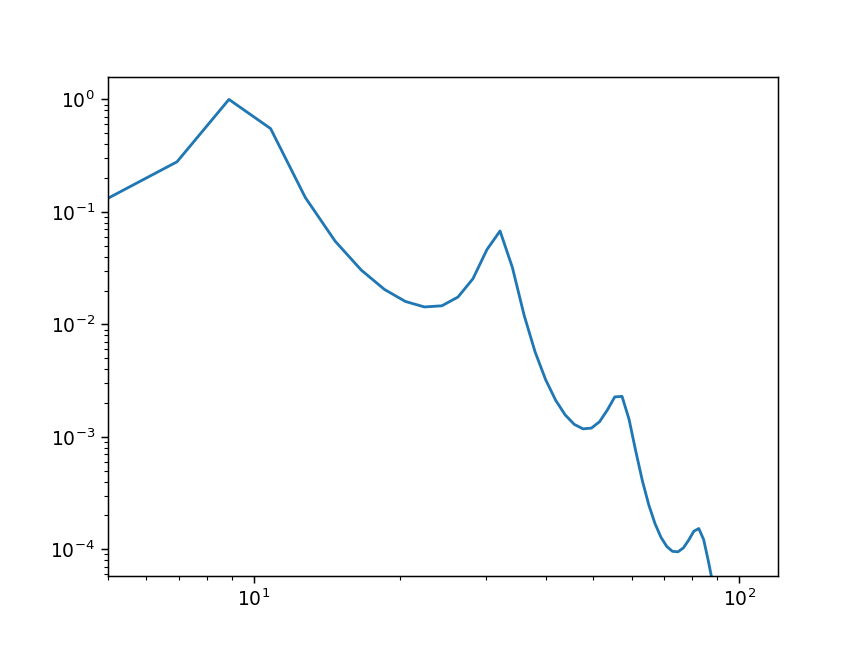

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J0dfZWUnLCBtYXg9MjApLCBJbnRTbGlkZXIodmFsdWU9LTcsIGRlc2NyaXB0aW9uPXUnR19laSfigKY=


In [2]:
mod = Abeysuriya2015Model()
#mod.bound_t0 = [0,140]
mod.plot_widget(normalize=True)

Compute + plot power spectrum with speified parameters

<IPython.core.display.Javascript object>


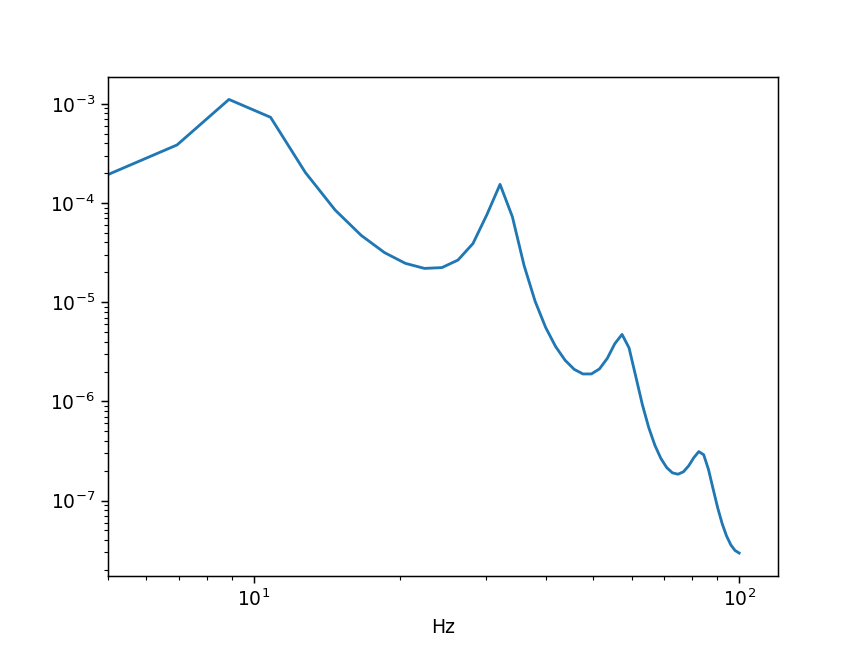

In [2]:
mod = Abeysuriya2015Model()
mod.G_ee = 11.
mod.G_ei = -9.
mod.G_ese = 8.
mod.compute_P(mod.freqs,return_df=True)['P_EEG_EMG'].plot(logx=True,logy=True,xlim=[5,120])

## Observations on model parameter effects

In [19]:
# (to do...)

## Fitting

In [6]:
mat = loadmat('100307_MEG_3-Restin_powavg.mat',struct_as_record=False,squeeze_me=True)['freq']

hcp_ps = pd.DataFrame(mat.powspctrm,columns=mat.freq,index=mat.label).T

data = hcp_ps.mean(axis=1).values
freqs = hcp_ps.index.values

data_mul = (hcp_ps.mean(axis=1).values*10**24).astype(float)

param_list = ['G_ee','G_ei','G_ese','G_esre','G_srs',
              'alpha','beta','t0','A_EMG']
       

Non-normalized power spectrum

In [27]:
fit_mod = Abeysuriya2015Model()

               
fit_res,fit_df = fit_mod.fit(data_mul,freqs,param_list,5,normalize=False)#True)

<IPython.core.display.Javascript object>


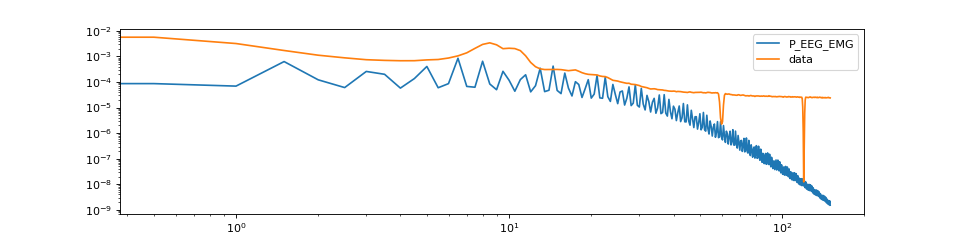

In [28]:
fit_df[['P_EEG_EMG', 'data']].plot(logx=True,logy=True,figsize=(12,3))

In [21]:
fit_res

      fun: 255.70880453656955
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.81356324e+00,  4.43443184e+00,  5.99717964e-01,  2.02575734e+01,
       -7.18034414e+01, -6.24669383e-01, -2.70688361e-02,  1.80346404e+01,
       -8.90027171e+06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 80
      nit: 1
   status: 0
  success: True
        x: array([ 5.46980908e+00, -7.02542574e+00,  5.61386878e+00, -3.00540462e+00,
       -5.94846436e-01,  7.50058810e+01,  2.85000249e+02,  8.40897669e+01,
        5.05153564e-13])

Normalized power spectrum

In [3]:
fit_mod_norm = Abeysuriya2015Model()

               
fit_res_norm,fit_df_norm = fit_mod_norm.fit(data,freqs,param_list,5,normalize=True)# alse)#True)

C:\Users\John\brainhack_test\SpectralNeuralModels\scratch\robinson.py:174: RuntimeWarning: invalid value encountered in true_divide
  P_EEG = P_EEG/P_EEG.max()
C:\Users\John\brainhack_test\SpectralNeuralModels\scratch\robinson.py:175: RuntimeWarning: invalid value encountered in true_divide
  P_EMG = P_EMG/P_EMG.max()
C:\Users\John\brainhack_test\SpectralNeuralModels\scratch\robinson.py:176: RuntimeWarning: invalid value encountered in true_divide
  P_EEG_EMG = P_EEG_EMG/P_EEG_EMG.max()


<IPython.core.display.Javascript object>


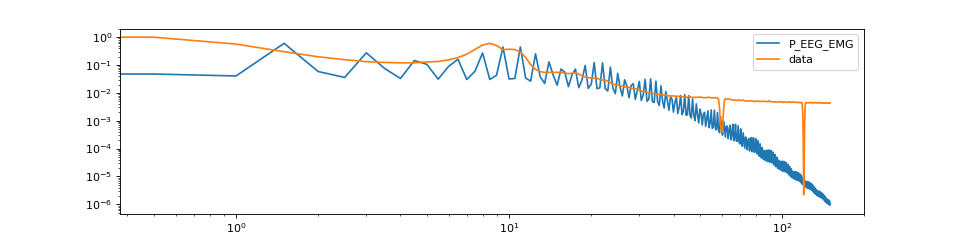

In [4]:
fit_df_norm[['P_EEG_EMG', 'data']].plot(logx=True,logy=True,figsize=(12,3))

In [5]:
fit_res_norm

      fun: 289.67798738740845
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.79685975e+02, -2.36704892e+02, -1.41897493e+02, -1.62151338e+02,
       -2.24667411e+02,  8.97784957e-01,  4.33715286e-03, -6.86707324e+02,
        1.24604542e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 50
      nit: 1
   status: 0
  success: True
        x: array([ 5.41504196e+00, -6.99278810e+00,  5.63544134e+00, -2.79711524e+00,
       -5.99484864e-01,  7.49994907e+01,  2.84999993e+02,  8.39907276e+01,
        4.99484864e-13])

In [20]:
fit_res_norm

      fun: nan
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.38703961e+02, -2.87094906e+02, -1.75782316e+02, -1.97219248e+02,
       -2.59463593e+02,  1.43026568e+00,  2.03215222e-02,  2.05179060e+02,
        1.89382338e+08])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 210
      nit: 0
   status: 2
  success: False
        x: array([ 5.40e+00, -7.00e+00,  5.60e+00, -2.80e+00, -6.00e-01,  7.50e+01,
        2.85e+02,  8.40e+01,  5.00e-13])

Adjusted nominal values:

In [7]:
fit_mod_3 = Abeysuriya2015Model()

# modify the initial values for some params. These values given an alpha peak. 
fit_mod_3.G_ee = 11.
fit_mod_3.G_ei = -9.
fit_mod_3.G_ese = 8.
               
fit_res_3,fit_df_3 = fit_mod_3.fit(data,freqs,param_list,5,normalize=False) # True)# alse)#True)


<IPython.core.display.Javascript object>


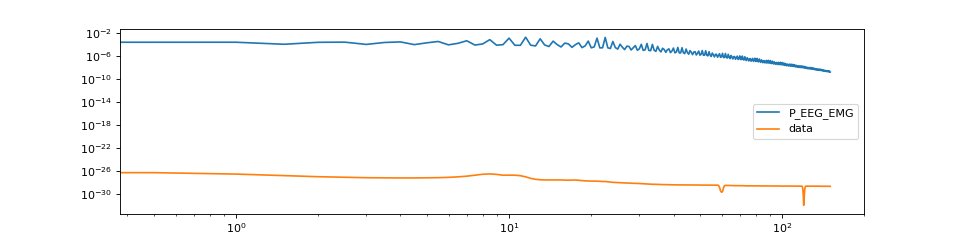

In [8]:
fit_df_3[['P_EEG_EMG', 'data']].plot(logx=True,logy=True,figsize=(12,3))

In [9]:
fit_res_3

      fun: 2.2915048915362828e+50
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.95197022e+50, -2.22016516e+50,  3.79615391e+50, -3.43785257e+49,
        2.16493739e+51,  2.85270605e+48, -9.42921110e+44, -6.58176632e+51,
        1.95988292e+55])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 50
      nit: 1
   status: 0
  success: True
        x: array([ 1.10059591e+01, -8.99404088e+00,  8.02118798e+00, -2.79814605e+00,
       -5.99668938e-01,  7.49569619e+01,  2.84877507e+02,  8.40370790e+01,
        4.99668938e-13])